In [1]:
import json
from BuildGraphModule import *
from unidecode import unidecode

In [2]:
with open('paper.json', 'r') as f:
    data = json.load(f)

In [3]:
# Uniform strings - Authors
for i in list(data.keys()):
    try:
        for j in range(len(data[i]['Authors'])):
            t = unidecode(data[i]['Authors'][j])
            t.encode("ascii")
            data[i]['Authors'][j] = t.lower().replace('.','')
            
    except:
        continue

In [4]:
# Uniform strings - EPFL Authors
for i in list(data.keys()):
    dic = []
    try:
        for j in range(len(data[i]['Epfl authors'])):
            string = list(data[i]['Epfl authors'][j].keys())[0]
            t = unidecode(string)
            t.encode("ascii")
            dic += [{t.lower().replace('.','') : list(data[i]['Epfl authors'][j].values())[0]}]
        data[i]['Epfl authors'] = dic
    except:
        continue

In [5]:
authors = get_authors(data, 'Authors')

In [4]:
# All
dictionary_a_id, dictionary_id_a = create_authors_id(authors, 'all')

In [5]:
# All
dict_authors = list_coauthors(data)

In [ ]:
# All
dict_numb_coll = number_collaborations(dict_authors)

In [ ]:
# All
dict_authors_set = set_coauthors(dict_authors)

In [ ]:
# All
edges = create_edges(dict_authors_set, dictionary_a_id)

## EPFL graph: Multiplegraph

In [5]:
authors_epfl = get_authors(data, 'Epfl authors')
# Due to the format which the authors have been saved

# We initialize a new list
epfl_authors = []

# Then for each element in the previous list
for i in authors_epfl:
    # We unpack the content
    epfl_authors += list(i.keys())

In [6]:
# Id-Author / Author-ID
dictionary_a_id_epfl, dictionary_id_a_epfl = create_authors_id(epfl_authors, 'epfl')

In [7]:
# EPFL - COAUTORI NELLA LISTA DI EPFL AUTHORS
dict_authors_epfl = list_coauthors_epfl(data)

In [8]:
# Number of collaborations
dict_numb_coll_epfl = number_collaborations(dict_authors_epfl)

In [9]:
# Coauthors set
dict_authors_set_epfl = set_coauthors(dict_authors_epfl)

In [10]:
# Set of edges
edges_epfl = create_edges(dict_authors_set_epfl, dictionary_a_id_epfl)

In [11]:
G = create_simple_graph(dictionary_id_a_epfl, edges_epfl)

Name: 
Type: Graph
Number of nodes: 13451
Number of edges: 45417
Average degree:   6.7530


In [12]:
# Initialize the dictionary
dict_authors_epfl = defaultdict(list)

# For each pubblication
for p in list(data.keys()):
    # If present
    try:
        # Extracte the list of epfl authors
        list_authors_raw = data[p]['Epfl authors']
        # Unpack the list
        list_authors_list = [list(i.keys()) for i in list_authors_raw]

        # Whether the list of authors contains more than one element
        if len(list_authors_list) > 1:
            # Get the final list unpacking elements
            list_authors = [i[0] for i in list_authors_list]
        else:
            # Just get the element as the list
            list_authors = list_authors_list[0]

        # For each author create an instance in the dictionary
        for a in list_authors:
            dict_authors_epfl[a] += [{j:p} for j in list_authors if j != a]

    # If there re not epfl authors continue the loop
    except:
        continue

In [13]:
dict_coautorship_papers = {}
for author in list(dict_authors_epfl.keys()):
    
    dict_papers = defaultdict(list)
    for i in range(len(dict_authors_epfl[author])):

        coauthor = list(dict_authors_epfl[author][i].keys())[0]

        dict_papers[coauthor] += [(dict_authors_epfl[author][i])[coauthor]]

    dict_coautorship_papers[author] = dict_papers

In [14]:
dictionary = {}
dictionary_occ = {}
for i in list(dict_coautorship_papers.keys()):
    dictionary[i] = {}
    dictionary_occ[i] = {}
    for j in list(dict_coautorship_papers[i].keys()):
        dates = defaultdict(list)
        for l in range(len(dict_coautorship_papers[i][j])):
            try:
                dates[data[sorted(dict_coautorship_papers[i][j])[l]]['Publication date']] += [sorted(dict_coautorship_papers[i][j])[l]]
            except:
                continue
        if len(dates) != 0:
            dictionary[i][j] = dates
            dictionary_occurences = {}
            for k,m in dictionary[i][j].items():
                dictionary_occurences[k] = len(m)
            dictionary_occ[i][j] = dictionary_occurences

In [15]:
# Define an epty set of edges
edges = set()

# For each author
for key in list(dict_authors_set_epfl.keys()):       
    # If the list of co-authors is not empty
    if len(dict_authors_set_epfl[key]) != 0:
        # Create sorted tuples between the author and his coauthors
        new_edges = [tuple(sorted((dictionary_a_id_epfl[key], dictionary_a_id_epfl[co]))) for co in dict_authors_set_epfl[key]]

        # Update the set in order to not have the double arches
        edges.update(new_edges)

In [16]:
dictionary['catasta michele']

{'aberer karl': defaultdict(list,
             {'2012': ['182131', '182133'],
              '2013': ['188836', '196256'],
              '2014': ['202024'],
              '2015': ['208793']}),
 'christodoulou georgios': defaultdict(list, {'2014': ['202024']}),
 'cudre-mauroux philippe': defaultdict(list, {'2013': ['196256']}),
 'gavrilovic ivan': defaultdict(list, {'2014': ['202024']}),
 'hrisafov filip': defaultdict(list, {'2014': ['202024']}),
 'mcdowell lucas kelsey': defaultdict(list, {'2012': ['182131', '182133']}),
 'monney mathieu': defaultdict(list, {'2014': ['202024']}),
 'ouaazki abdessalam': defaultdict(list, {'2014': ['202024']}),
 'perovic boris': defaultdict(list, {'2014': ['202024']}),
 'ranvier jean-eudes marie': defaultdict(list, {'2014': ['202024']}),
 'sae-tang abson': defaultdict(list, {'2012': ['182133']}),
 'tran le hung': defaultdict(list, {'2012': ['182131']}),
 'vasirani matteo': defaultdict(list,
             {'2014': ['202024'], '2015': ['208793']}),
 'yan zhi

In [17]:
dictionary_occ['catasta michele']

{'aberer karl': {'2012': 2, '2013': 2, '2014': 1, '2015': 1},
 'christodoulou georgios': {'2014': 1},
 'cudre-mauroux philippe': {'2013': 1},
 'gavrilovic ivan': {'2014': 1},
 'hrisafov filip': {'2014': 1},
 'mcdowell lucas kelsey': {'2012': 2},
 'monney mathieu': {'2014': 1},
 'ouaazki abdessalam': {'2014': 1},
 'perovic boris': {'2014': 1},
 'ranvier jean-eudes marie': {'2014': 1},
 'sae-tang abson': {'2012': 1},
 'tran le hung': {'2012': 1},
 'vasirani matteo': {'2014': 1, '2015': 1},
 'yan zhixian': {'2014': 1},
 'yerva surender reddy': {'2013': 1}}

In [18]:
G_epfl = nx.MultiGraph()

In [19]:
G_epfl.add_nodes_from(list(dictionary_id_a_epfl.keys()))

In [20]:
G_epfl.add_edges_from(list(edges_epfl))

In [21]:
new_edges = []
to_remove = []
for i,j in list(edges_epfl):
    
    try:    
        for k in list(dictionary_occ[dictionary_id_a_epfl[i]][dictionary_id_a_epfl[j]].keys()):
        #print (list(dictionary_occ[dictionary_id_a_epfl[i]][dictionary_id_a_epfl[j]].keys()))
        #print (i,j)
            new_edges += [(i, j, dict(year = k))]
            to_remove += [(i,j)]
    except:
        continue

In [22]:
G_epfl.add_edges_from(new_edges)
#G_epfl.remove_edges_from(set(to_remove))

In [23]:
dictionary_a_id_epfl['agir berker']

4893

In [24]:
for i,j in G_epfl.edges():
    for k in G_epfl[i][j]:
        #print (k)
        if k == 0:
            G_epfl[i][j][k]['weight'] = dict_numb_coll_epfl[dictionary_id_a_epfl[i]][dictionary_id_a_epfl[j]]
        else:
            #print (G_epfl[i][j][k]['year'])
            G_epfl[i][j][k]['weight'] = dictionary_occ[dictionary_id_a_epfl[i]][dictionary_id_a_epfl[j]][G_epfl[i][j][k]['year']]
    

In [25]:
G_epfl[dictionary_a_id_epfl['catasta michele']]#[1]#['weight'] = 5

{26: {0: {'weight': 1}, 1: {'weight': 1, 'year': '2014'}},
 1522: {0: {'weight': 1}, 1: {'weight': 1, 'year': '2013'}},
 2296: {0: {'weight': 5}, 1: {'weight': 1, 'year': '2013'}},
 2897: {0: {'weight': 1}},
 3087: {0: {'weight': 1}},
 3112: {0: {'weight': 1}, 1: {'weight': 1, 'year': '2014'}},
 3579: {0: {'weight': 1}, 1: {'weight': 1, 'year': '2012'}},
 4757: {0: {'weight': 1}, 1: {'weight': 1, 'year': '2014'}},
 5321: {0: {'weight': 1}},
 5562: {0: {'weight': 3},
  1: {'weight': 1, 'year': '2014'},
  2: {'weight': 1, 'year': '2015'}},
 5642: {0: {'weight': 2}, 1: {'weight': 1, 'year': '2014'}},
 5770: {0: {'weight': 2}, 1: {'weight': 2, 'year': '2012'}},
 8713: {0: {'weight': 2}, 1: {'weight': 1, 'year': '2014'}},
 8954: {0: {'weight': 12},
  1: {'weight': 1, 'year': '2014'},
  2: {'weight': 1, 'year': '2015'},
  3: {'weight': 2, 'year': '2012'},
  4: {'weight': 2, 'year': '2013'}},
 9748: {0: {'weight': 1}},
 10398: {0: {'weight': 1}, 1: {'weight': 1, 'year': '2014'}},
 11040: {0: 

In [26]:
G[dictionary_a_id_epfl['catasta michele']]

{26: {},
 1522: {},
 2296: {},
 2897: {},
 3087: {},
 3112: {},
 3579: {},
 4757: {},
 5321: {},
 5562: {},
 5642: {},
 5770: {},
 8713: {},
 8954: {},
 9748: {},
 10398: {},
 11040: {},
 11576: {},
 12852: {}}

In [27]:
for i,j in G.edges():
    for k in G[i]:
        #print (k)
        
        G[i][j]['weight'] = dict_numb_coll_epfl[dictionary_id_a_epfl[i]][dictionary_id_a_epfl[j]]

# Basic statistics on the graph

In [28]:
# Get the range of years
dict_years = defaultdict(int)
for paper in list(data.keys()):
    try:
        #print (paper['Publication date'])
        dict_years[data[paper]['Publication date']] += 1
    except:
        continue

In [346]:
#dict_years

In [30]:
del dict_years['August 31-September 2 2005']
del dict_years['0']

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

After a first glance twe observe that:
* The oldest publications are thos which may contain fragmented and incomplete information
* The number of publication in considerably higher from the latest 90s to nowdays

As consequence we decide to focus our attention on the publications corresponding to the aforementioned period.

<Container object of 84 artists>

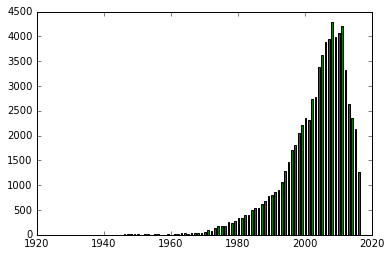

In [32]:
plt.bar(dict_years.keys(), dict_years.values(), 0.5, color='g')

In [77]:
data_cut = {}
for paper in list(data.keys()):
    try:
        if int(data[paper]['Publication date']) >= 1993:
            data_cut[paper] = data[paper]
    except:
        continue

In [78]:
data_cut['52256']['Labs involved'][0]

{'Laboratory of Nonlinear Systems': 'http://lanoswww.epfl.ch/'}

# LABS

In [79]:
# (lab,website)
dict_lab_site = {}
# (lab, num publications)
dict_labs = defaultdict(int)
# (lab, list of papers)
dict_labs_paper = defaultdict(list)
i = 0
for paper in list(data_cut.keys()):
    try:
        if len(data_cut[paper]['Labs involved']) == 1:
            dict_lab_site[list(data_cut[paper]['Labs involved'][0].keys())[0]] = list(data_cut[paper]['Labs involved'][0].values())[0]
            dict_labs[list(data_cut[paper]['Labs involved'][0].keys())[0]] += 1
            dict_labs_paper[list(data_cut[paper]['Labs involved'][0].keys())[0]] += [paper]
            
        else:
            #print ('else')
            for lab in data_cut[paper]['Labs involved']:
                dict_lab_site[list(lab.keys())[0]] = list(lab.values())[0]     
                dict_labs[list(lab.keys())[0]] += 1
                dict_labs_paper[list(lab.keys())[0]] += [paper]
    except:
        continue

# EPFL STRUCTURE

In [89]:
import requests
from bs4 import BeautifulSoup

In [127]:
site

'http://lsmb.epfl.ch'

In [187]:
req = requests.get('https://search.epfl.ch/ubrowse.action?acro=EPFL')
html = req.content

In [188]:
soup = BeautifulSoup(html, 'html.parser')

In [189]:
len(soup.findAll('div', {'class':'unit_name'}))

18

In [199]:
new_links_to_go = []
dictio = []
for i in soup.findAll('div', {'class':'unit_name'}):
    if i.findAll('a')[0].text.strip()[:6] == 'School':
        new_links_to_go += [i.findAll('a')[0].get('href')]
        dictio += [i.findAll('a')[0].text.strip()]

In [194]:
new_links_to_go

['/ubrowse.action?acro=ENAC',
 '/ubrowse.action?acro=SB',
 '/ubrowse.action?acro=IC',
 '/ubrowse.action?acro=STI',
 '/ubrowse.action?acro=SV']

In [200]:
dictio

['School of Architecture, Civil and Environmental Engineering',
 'School of Basic Sciences',
 'School of Computer and Communication Sciences',
 'School of Engineering',
 'School of Life Sciences']

In [328]:
prova = defaultdict(list)

In [329]:
def traverse_epfl_tree(root):
    global prova
    
    #Request root url
    request = requests.get(root)
    html = request.content
    #get the soup
    soup = BeautifulSoup(html, 'html.parser')
    
    #find eventual children
    children = soup.findAll("div", { "class" : "unit_name" })
    #check if node is a leaf
    
    is_leaf = (len(children) == 0)
    #print (is_leaf)
    #parse and add node to the db (see def of create_node)
    
    #create_node(soup, is_leaf) # save data 
    
    if is_leaf == False:
        #continue exploring the tree
        for elem in children:
            print (soup.findAll('h2')[0].text.replace('\n',' ').split('  ')[0])
            prova[soup.findAll('h2')[0].text.replace('\n',' ').split('  ')[0]] += [elem.findAll('a')[0].text.strip()]
            #print (elem)
            traverse_epfl_tree("https://search.epfl.ch" + elem.find('a').get('href'))

In [343]:
#traverse_epfl_tree('https://search.epfl.ch/ubrowse.action?acro=SV')

In [333]:
import pickle
pickle.dump(prova, open('SV.p', 'wb')) # Store the variable in a file.

In [335]:
school_SV = pickle.load(open('SV.p', 'rb')) # Recall 

In [340]:
# Get dictionary (lab,school)
def school_lab(dict_lab_site, name_school):
    
    school = pickle.load(open(name_school + '.p', 'rb')) # Recall 
    lab_school = {}
    for i in list(dict_lab_site.keys()):
        for nodes in list(school.keys()):
            list_node = school[nodes]
            if i in list_node:
                lab_school[i] = name_school
                break
            else:
                continue   
    
    return lab_school

In [349]:
school_lab(dict_lab_site, 'IC')

{'Algorithmics Laboratory': 'IC',
 'Artificial Intelligence Laboratory': 'IC',
 'Computer Communications and Applications Laboratory 1': 'IC',
 'Computer Communications and Applications Laboratory 2': 'IC',
 'Computer Communications and Applications Laboratory 3': 'IC',
 'Computer Communications and Applications Laboratory 4': 'IC',
 'Computer Graphics and Geometry Laboratory': 'IC',
 'Computer Vision Laboratory': 'IC',
 'Computer-Human Interaction Lab for Learning & Instruction': 'IC',
 'Data Analysis Theory and Applications Laboratory': 'IC',
 'Data-Intensive Applications and Systems Laboratory': 'IC',
 'Dependable Systems Laboratory': 'IC',
 'Distributed Information Systems Laboratory': 'IC',
 'Distributed Programming Laboratory': 'IC',
 'Distributed Systems Laboratory': 'IC',
 'Image and Visual Representation Laboratory': 'IC',
 'Information Theory Laboratory': 'IC',
 'Laboratory for Automated Reasoning and Analysis': 'IC',
 'Laboratory for Computational Biology and Bioinformatics'